In [226]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm

# Market Data for China

In [230]:
df_CRSP_market_daily=pd.read_excel('../data/Chinese_Stock_Data/000985_market_index.xlsx',\
index_col=0,parse_dates=True)
df_CRSP_market_daily = df_CRSP_market_daily.iloc[:-1,:]
df_CRSP_market_daily.columns=['Name','Date','Open','High','Low','Close','Volume','Dollar_Volume']
df_CRSP_market_daily.index.name='Ticker'
df_CRSP_market_daily = df_CRSP_market_daily.set_index(keys='Date')
df_CRSP_market_daily.index= pd.to_datetime(df_CRSP_market_daily.index)
df_CRSP_market_daily['vwretd']=(np.log(df_CRSP_market_daily[['Close']])-np.log(df_CRSP_market_daily[['Close']]).shift(1))
df_CRSP_market_daily = df_CRSP_market_daily.iloc[1:]

In [231]:
df_CRSP_market_daily.tail()

,Name,Open,High,Low,Close,Volume,Dollar_Volume,vwretd
Date,,,,,,,,
2021-02-01,中证全指,5611.97,5669.91,5601.71,5667.79,57947749800,789282259900,0.009256
2021-02-02,中证全指,5677.29,5744.39,5650.09,5742.20,56201856600,834777113600,0.013043
2021-02-03,中证全指,5740.97,5764.51,5701.93,5706.48,60700577600,885198806000,-0.006240
2021-02-04,中证全指,5679.01,5718.71,5592.22,5660.39,61507972500,875507279100,-0.008110
2021-02-05,中证全指,5677.58,5710.18,5625.09,5628.43,57362900800,826945703200,-0.005662


<AxesSubplot:xlabel='Date'>

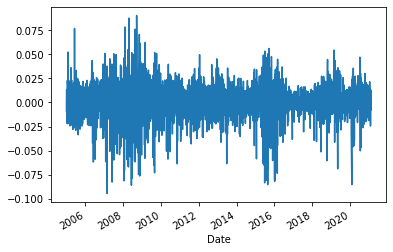

In [232]:
df_CRSP_market_daily.vwretd.plot()

In [233]:
df_AQR_risk_free_daily=pd.read_csv('../data/Chinese_Stock_Data/China 1-Year Yield.csv',\
index_col=0,parse_dates=True)

In [234]:
df_AQR_risk_free_daily = (1+df_AQR_risk_free_daily/100)**(1/252)-1

In [235]:
df_AQR_risk_free_daily

,Risk Free Rate
Date,
2005-01-28,0.000103
2005-01-31,0.000099
2005-02-01,0.000101
2005-02-02,0.000101
2005-02-03,0.000103
...,...
2020-12-25,0.000110
2020-12-28,0.000108
2020-12-29,0.000107


# Single Stock Data

In [236]:
df_china_stock_all=pd.read_csv('../data/Chinese_Stock_Data/close_20050101_to_20201231.csv',header=0
                                   ,index_col=0,parse_dates=True)
df_ticker_mapping = pd.read_csv('../data/Chinese_Stock_Data/metadata.csv',usecols=[0,2,3,4,5])
df_ticker_mapping= df_ticker_mapping.rename(columns={'Unnamed: 0':'code'})
code = [i[:-5] for i in df_ticker_mapping.code.values]
df_ticker_mapping.code= code
mapping_result=[df_ticker_mapping.loc[df_ticker_mapping.code==i, 'name'].values[0] 
                for i in df_china_stock_all.columns.values]


In [46]:
#df_china_stock_all.columns=mapping_result

In [237]:
df_china_stock_all

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688668,688678,688679,688686,688698,688699,688777,688788,688981,689009
2005-01-04,1.47,0.98,5.15,1.29,0.49,1.50,0.79,1.08,1.10,2.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,1.46,1.02,5.26,1.32,0.50,1.55,0.81,1.10,1.14,2.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,1.47,1.01,5.28,1.32,0.50,1.54,0.81,1.10,1.15,2.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,1.47,1.02,5.26,1.38,0.55,1.60,0.83,1.12,1.16,2.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,1.49,1.01,5.29,1.42,0.57,1.77,0.87,1.15,1.21,2.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,18.04,28.10,21.71,2.52,5.65,8.52,2.56,7.59,3.91,11.83,...,31.70,25.65,19.02,NaN,NaN,59.20,98.30,183.00,53.43,75.10
2020-12-28,18.85,28.42,20.45,2.49,5.50,8.50,2.51,7.35,3.59,11.48,...,29.68,22.90,16.07,NaN,NaN,55.90,102.35,146.40,52.03,80.10
2020-12-29,19.17,28.52,20.66,2.50,5.53,8.60,2.51,7.33,3.95,11.85,...,29.89,22.46,15.55,NaN,20.02,54.01,98.41,128.11,52.53,77.46
2020-12-30,19.20,28.38,20.47,2.49,5.54,7.74,2.52,7.58,3.97,12.16,...,29.91,22.24,15.74,NaN,19.35,54.20,99.98,133.00,56.47,80.91


In [238]:
df_one_day_one_stock = df_china_stock_all[['000002']]
df_one_day_one_stock.index.name=df_one_day_one_stock.columns[0]
df_one_day_one_stock.columns=['Close']


In [239]:
df_one_day_one_stock.tail()

,Close
000002,
2020-12-25,28.10
2020-12-28,28.42
2020-12-29,28.52
2020-12-30,28.38
2020-12-31,28.70


In [240]:
df_one_day_one_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3889 entries, 2005-01-04 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3889 non-null   float64
dtypes: float64(1)
memory usage: 60.8 KB


In [241]:
df_return=(np.log(df_one_day_one_stock[['Close']])-np.log(df_one_day_one_stock[['Close']]).shift(1))[1:]
df_return.columns=['total_ret']

## Merge all required data

In [242]:
dfs=[df_return,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']]]

In [243]:
df_one_stock_return_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)

In [244]:
df_one_stock_return_merged.tail()

,total_ret,Risk Free Rate,vwretd
2020-12-25,0.005710,0.000110,0.009291
2020-12-28,0.011324,0.000108,-0.000348
2020-12-29,0.003512,0.000107,-0.005372
2020-12-30,-0.004921,0.000107,0.012718
2020-12-31,0.011212,0.000106,0.017494


In [245]:
df_one_stock_return_merged.total_ret =df_one_stock_return_merged.total_ret-\
df_one_stock_return_merged['Risk Free Rate']
df_one_stock_return_merged.vwretd =df_one_stock_return_merged.vwretd-\
df_one_stock_return_merged['Risk Free Rate'] 

In [246]:
df_one_stock_return_merged=df_one_stock_return_merged.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt',
                                                                     'total_ret':'ret'})

In [247]:
df_one_stock_return_merged.tail()

,ret,rf,mkt
2020-12-25,0.005600,0.000110,0.009180
2020-12-28,0.011216,0.000108,-0.000456
2020-12-29,0.003405,0.000107,-0.005479
2020-12-30,-0.005028,0.000107,0.012611
2020-12-31,0.011107,0.000106,0.017388


## Beta Calculation

### ex ante beta

In [248]:
# Estimate rolling 5 year(1260 trading days) correlations with 
# minimum 750 non-missing datapoints
df_one_stock_return_merged['corr'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_one_stock_return_merged['mkt']))
df_one_stock_return_merged['corr'] = df_one_stock_return_merged['corr'].shift(1)

In [249]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2005-01-28,-0.000103,0.000103,-0.011510,NaN
2005-01-31,0.009380,0.000099,-0.022112,NaN
2005-02-01,-0.000101,0.000101,-0.004093,NaN
2005-02-02,0.045990,0.000101,0.052251,NaN
2005-02-03,-0.009153,0.000103,-0.016174,NaN
...,...,...,...,...
2020-12-25,0.005600,0.000110,0.009180,0.372693
2020-12-28,0.011216,0.000108,-0.000456,0.371227
2020-12-29,0.003405,0.000107,-0.005479,0.370443
2020-12-30,-0.005028,0.000107,0.012611,0.370425


<AxesSubplot:title={'center':'AAME Total Return'}>

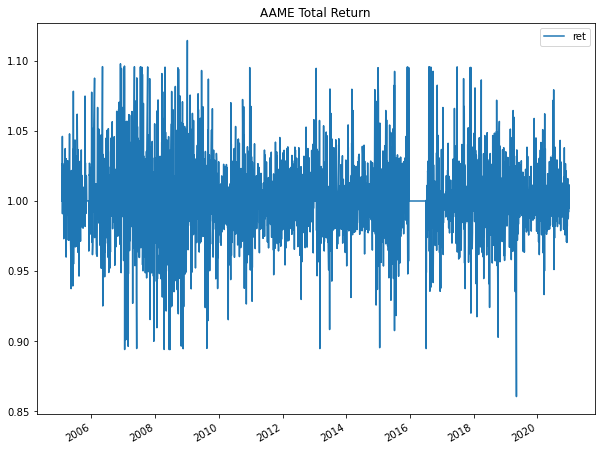

In [250]:
(df_one_stock_return_merged[['ret']]+1).plot(figsize=(10,8),title='AAME Total Return')

In [251]:
(df_one_stock_return_merged[['ret']]+1).sort_values(by='ret')

,ret
2019-05-06,0.860412
2008-06-19,0.893909
2007-01-17,0.893972
2008-06-10,0.894007
2008-04-14,0.894030
...,...
2007-05-09,1.095684
2006-05-08,1.095752
2007-01-15,1.096187
2006-11-30,1.097774


In [252]:
df_log_return_three_days=np.log(df_one_stock_return_merged[['ret','mkt']]+1).rolling(window=3).sum()

In [253]:
df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_log_return_three_days['mkt']))
df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)

<AxesSubplot:>

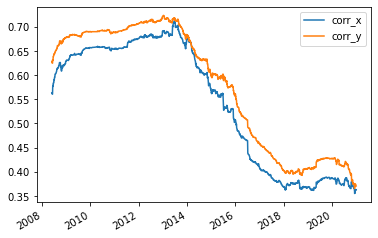

In [254]:
pd.merge(df_log_return_three_days['corr'],df_one_stock_return_merged['corr'],left_index=True,
        right_index=True).dropna().plot()

In [255]:
# use three-day log returns to control for nonsynchronous trading
df_one_stock_return_merged['corr']=df_log_return_three_days['corr']

In [256]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2005-01-28,-0.000103,0.000103,-0.011510,NaN
2005-01-31,0.009380,0.000099,-0.022112,NaN
2005-02-01,-0.000101,0.000101,-0.004093,NaN
2005-02-02,0.045990,0.000101,0.052251,NaN
2005-02-03,-0.009153,0.000103,-0.016174,NaN
...,...,...,...,...
2020-12-25,0.005600,0.000110,0.009180,0.361614
2020-12-28,0.011216,0.000108,-0.000456,0.361857
2020-12-29,0.003405,0.000107,-0.005479,0.361786
2020-12-30,-0.005028,0.000107,0.012611,0.362123


In [257]:
# same for rolling std, but with 1 year horizon (252 trading days) with 
# minimum 120 non-missing datapoints
df_one_stock_return_merged['i_std'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['i_std'] = df_one_stock_return_merged['i_std'].shift(1)

df_one_stock_return_merged['mkt_std'] = pd.DataFrame(df_one_stock_return_merged['mkt'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['mkt_std'] = df_one_stock_return_merged['mkt_std'].shift(1)

In [258]:
df_one_stock_return_merged

,ret,rf,mkt,corr,i_std,mkt_std
2005-01-28,-0.000103,0.000103,-0.011510,NaN,NaN,NaN
2005-01-31,0.009380,0.000099,-0.022112,NaN,NaN,NaN
2005-02-01,-0.000101,0.000101,-0.004093,NaN,NaN,NaN
2005-02-02,0.045990,0.000101,0.052251,NaN,NaN,NaN
2005-02-03,-0.009153,0.000103,-0.016174,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-25,0.005600,0.000110,0.009180,0.361614,0.019307,0.013699
2020-12-28,0.011216,0.000108,-0.000456,0.361857,0.018957,0.013709
2020-12-29,0.003405,0.000107,-0.005479,0.361786,0.018956,0.013709
2020-12-30,-0.005028,0.000107,0.012611,0.362123,0.018939,0.013714


In [259]:

#drop all the rows where in ANY column there is a NAN value
df_one_stock_return_merged = df_one_stock_return_merged.dropna(how='any')
# Estimation betas like on page 8 in eq (14) in the paper
df_one_stock_return_merged['beta_est'] = df_one_stock_return_merged['corr']*\
df_one_stock_return_merged['i_std'].div(df_one_stock_return_merged['mkt_std'])
#Shrink the betas to make them less noisy eq(15)
df_one_stock_return_merged['beta_est'] = 0.6*df_one_stock_return_merged['beta_est'] + 0.4

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [260]:
df_one_stock_return_merged

,ret,rf,mkt,corr,i_std,mkt_std,beta_est
2008-05-30,0.027531,0.000120,0.006779,0.563034,0.038232,0.026975,0.878804
2008-06-02,-0.020787,0.000120,0.005509,0.562992,0.038153,0.026943,0.878341
2008-06-03,0.011417,0.000117,-0.003590,0.563187,0.038156,0.026945,0.878511
2008-06-04,0.045834,0.000112,-0.018269,0.563197,0.038150,0.026924,0.878813
2008-06-05,-0.000122,0.000122,-0.010503,0.562585,0.038256,0.026910,0.879860
...,...,...,...,...,...,...,...
2020-12-25,0.005600,0.000110,0.009180,0.361614,0.019307,0.013699,0.705787
2020-12-28,0.011216,0.000108,-0.000456,0.361857,0.018957,0.013709,0.700237
2020-12-29,0.003405,0.000107,-0.005479,0.361786,0.018956,0.013709,0.700153
2020-12-30,-0.005028,0.000107,0.012611,0.362123,0.018939,0.013714,0.700048


<AxesSubplot:>

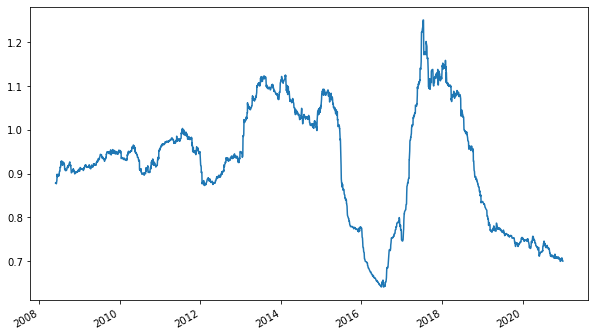

In [261]:
df_one_stock_return_merged.beta_est.plot(figsize=(10,6))

# All stocks

### Focus on One Day

In [265]:
tickers=df_china_stock_all.columns.values

In [266]:
df_china_stock_all['000001']

000002
2005-01-04     1.47
2005-01-05     1.46
2005-01-06     1.47
2005-01-07     1.47
2005-01-10     1.49
              ...  
2020-12-25    18.04
2020-12-28    18.85
2020-12-29    19.17
2020-12-30    19.20
2020-12-31    19.34
Name: 000001, Length: 3889, dtype: float64

In [267]:
def get_ex_ante_beta(code, df_risk_free,df_market):
    df_one_day_one_stock = df_china_stock_all[[code]]
    df_one_day_one_stock.columns=['Close']

    with np.errstate(divide='raise'):
        try:
            df_return=(np.log(df_one_day_one_stock[['Close']])-np.log(df_one_day_one_stock[['Close']]).shift(1))[1:]
        except FloatingPointError:
            bad_tickers.append(str(code))
            return pd.DataFrame()
    df_return.columns=['total_ret']
    dfs=[df_return,df_risk_free,df_market]
    df=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)
    df.total_ret =df.total_ret-df['Risk Free Rate']
    df.vwretd =df.vwretd-df['Risk Free Rate'] 
    df=df.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt','total_ret':'ret'})
    with np.errstate(invalid='raise'):
        try:
            df_log_return_three_days=np.log(df[['ret','mkt']]+1).rolling(window=3).sum()
        except FloatingPointError:
            df_log_return_three_days=(df[['ret','mkt']]+1).rolling(window=3).apply(np.prod, raw=True)-1
            bad_tickers.append(str(code))
    
    df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=651).\
             corr(df_log_return_three_days['mkt']))
    df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)
    df['corr']=df_log_return_three_days['corr']
    df['i_std'] = pd.DataFrame(df['ret'].rolling(252, min_periods=120).std())
    df['i_std'] = df['i_std'].shift(1)
    df['mkt_std'] = pd.DataFrame(df['mkt'].rolling(252, min_periods=120).std())
    df['mkt_std'] = df['mkt_std'].shift(1)
    df = df.dropna(how='any')
    df['beta_est'] = df['corr']*df['i_std'].div(df['mkt_std'])
    df['beta_est'] = 0.6*df['beta_est'] + 0.4
    return df[['ret','beta_est']]

In [268]:
get_ex_ante_beta('000001',df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])

,ret,beta_est
2008-01-02,-0.015929,0.809195
2008-01-03,-0.017258,0.809573
2008-01-04,0.026470,0.808898
2008-01-07,0.020645,0.808697
2008-01-08,0.030253,0.808711
...,...,...
2020-12-25,-0.012232,0.922886
2020-12-28,0.043813,0.922995
2020-12-29,0.016726,0.926775
2020-12-30,0.001457,0.926597


In [269]:
tickers_to_remove=pd.read_csv('../output/China/bad_tickers/bad_ticker_v2.txt',header=None,dtype='str')
tickers_to_remove = tickers_to_remove.values[:,0]

In [270]:
bad_tickers=[]

In [271]:
counter=0
for ticker in tickers:
    if ticker not in tickers_to_remove:
        df_=get_ex_ante_beta(ticker,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])
        if not len(df_)==0:
            counter+=1
            df_.to_pickle('../output/China/Ex_Ante_Beta/'+ticker+'.pickle')

In [272]:
#print('we have excluded {} tickers at the beginning'.format(len(tickers_to_remove)))
print('we have {} bad tickers left'.format(len(bad_tickers)))
print('we have {} tickers‘ beta outputted in total'.format(counter))

we have 0 bad tickers left
we have 3532 tickers‘ beta outputted in total


# Portfolio and BAB Factor Construction

In [273]:
beta_unit_dates_index=pd.read_pickle('../output/China/Ex_Ante_Beta/000001.pickle').index

In [274]:
beta_unit_dates_index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=3138, freq=None)

In [278]:
data_folder_path = '../output/China/Ex_Ante_Beta/'
filenames=os.listdir(data_folder_path)
filenames.sort()

In [279]:
all_tickers=[filename[:-7] for filename in filenames]

In [280]:
stock_beta_by_ticker_dict={}
for filename in filenames:
    if filename[:-7] not in tickers_to_remove:
        df_ = pd.read_pickle(data_folder_path+filename)
        stock_beta_by_ticker_dict[filename[:-7]]=df_

In [281]:
beta_unit_dates_index[0]

Timestamp('2008-01-02 00:00:00')

In [282]:
df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])

In [283]:
for filename in filenames:
    #print(filename)
    df_ = stock_beta_by_ticker_dict[filename[:-7]]
    if beta_unit_dates_index[0] in df_.index:
        _=df_.loc[beta_unit_dates_index[0]]
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret

In [284]:
df_one_day_beta = df_one_day_beta.dropna()
df_one_day_beta['q']=df_one_day_beta[['ex_ante_beta']].apply(lambda x: pd.qcut(x, 10, labels=range(1, 11)))
df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)

In [285]:
df_one_day_beta.groupby(['q']).mean()

,ex_ante_beta,ret
q,,
1,0.572279,0.008092
2,0.819502,0.028241
3,0.903145,0.028046
4,0.962969,0.029396
5,1.006412,0.032912
6,1.037321,0.035669
7,1.063092,0.032532
8,1.090451,0.029499
9,1.124060,0.029555


In [286]:
def get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames):
    df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])
    for filename in filenames:
        #print(filename)
        df_ = stock_beta_by_ticker_dict[filename[:-7]]
        if date in df_.index:
            _=df_.loc[date]
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret
    df_one_day_beta = df_one_day_beta.dropna()
    df_one_day_beta['q']=df_one_day_beta[['ex_ante_beta']].apply(lambda x: pd.qcut(x, 10, labels=range(1, 11)))
    df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
    df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
    df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)
    
    df_one_day_beta = df_one_day_beta.sort_values(by='ex_ante_beta')
    df_one_day_beta['rank'] = np.arange(1,len(df_one_day_beta)+1)
    z_bar = np.sum(df_one_day_beta['rank'])/len(df_one_day_beta)

    k = 2/np.sum(np.abs(df_one_day_beta['rank']-z_bar))

    w_l = k*(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'rank']-z_bar)*-1
    beta_l= np.sum(w_l.multiply(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ex_ante_beta']))

    w_h = k*(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'rank']-z_bar)
    beta_h= np.sum(w_h.multiply(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ex_ante_beta']))

    BAB_ret=np.sum((df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ret']).multiply(w_l))/beta_l-\
    np.sum((df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ret']).multiply(w_h))/beta_h
    df_one_day_beta  = df_one_day_beta.drop(columns='rank')
    df_final = df_one_day_beta.groupby(['q']).mean().copy()
    df_final = df_final.append(pd.DataFrame(index=['BAB'],data={'ex_ante_beta':0,'ret':BAB_ret}))
    return df_final

In [287]:
beta_unit_dates_index[0]

Timestamp('2008-01-02 00:00:00')

In [288]:
df_P_beta=pd.DataFrame(index=beta_unit_dates_index,columns=np.concatenate((np.arange(1,11,1), ['BAB'])))
df_P_return=pd.DataFrame(index=beta_unit_dates_index,columns=np.concatenate((np.arange(1,11,1), ['BAB'])))

In [289]:
get_one_day_portfolio(beta_unit_dates_index[2],stock_beta_by_ticker_dict,filenames)

,ex_ante_beta,ret
1,0.572081,0.004065
2,0.819706,0.002442
3,0.903339,0.002115
4,0.963827,0.001012
5,1.007650,0.004271
6,1.038871,0.005464
7,1.063959,0.001863
8,1.091447,0.004410
9,1.125044,0.003640
10,1.186569,0.003218


In [ ]:
for date in beta_unit_dates_index:
    print(date)
    df_=get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames)
    df_P_beta.loc[date]=df_.ex_ante_beta.values
    df_P_return.loc[date]=df_.ret.values
    df_P_beta.to_pickle('../output/China/Portfolio Beta and Return Daily/beta.pickle')
    df_P_return.to_pickle('../output/China/Portfolio Beta and Return Daily/return.pickle')

2008-01-02 00:00:00
2008-01-03 00:00:00
2008-01-04 00:00:00
2008-01-07 00:00:00
2008-01-08 00:00:00
2008-01-09 00:00:00
2008-01-10 00:00:00
2008-01-11 00:00:00
2008-01-14 00:00:00
2008-01-15 00:00:00
2008-01-16 00:00:00
2008-01-17 00:00:00
2008-01-18 00:00:00
2008-01-21 00:00:00
2008-01-22 00:00:00
2008-01-23 00:00:00
2008-01-24 00:00:00
2008-01-25 00:00:00
2008-01-28 00:00:00
2008-01-29 00:00:00
2008-01-30 00:00:00
2008-01-31 00:00:00
2008-02-01 00:00:00
2008-02-04 00:00:00
2008-02-05 00:00:00
2008-02-13 00:00:00
2008-02-14 00:00:00
2008-02-15 00:00:00
2008-02-18 00:00:00
2008-02-19 00:00:00
2008-02-20 00:00:00
2008-02-21 00:00:00
2008-02-22 00:00:00
2008-02-25 00:00:00
2008-02-26 00:00:00
2008-02-27 00:00:00
2008-02-28 00:00:00
2008-02-29 00:00:00
2008-03-03 00:00:00
2008-03-04 00:00:00
2008-03-05 00:00:00
2008-03-06 00:00:00
2008-03-07 00:00:00
2008-03-10 00:00:00
2008-03-11 00:00:00
2008-03-12 00:00:00
2008-03-13 00:00:00
2008-03-14 00:00:00
2008-03-17 00:00:00
2008-03-18 00:00:00


2009-09-03 00:00:00
2009-09-04 00:00:00
2009-09-07 00:00:00
2009-09-08 00:00:00
2009-09-09 00:00:00
2009-09-10 00:00:00
2009-09-11 00:00:00
2009-09-14 00:00:00
2009-09-15 00:00:00
2009-09-16 00:00:00
2009-09-17 00:00:00
2009-09-18 00:00:00
2009-09-21 00:00:00
2009-09-22 00:00:00
2009-09-23 00:00:00
2009-09-24 00:00:00
2009-09-25 00:00:00
2009-09-28 00:00:00
2009-09-29 00:00:00
2009-09-30 00:00:00
2009-10-09 00:00:00
2009-10-12 00:00:00
2009-10-13 00:00:00
2009-10-14 00:00:00
2009-10-15 00:00:00
2009-10-16 00:00:00
2009-10-19 00:00:00
2009-10-20 00:00:00
2009-10-21 00:00:00
2009-10-22 00:00:00
2009-10-23 00:00:00
2009-10-26 00:00:00
2009-10-27 00:00:00
2009-10-28 00:00:00
2009-10-29 00:00:00
2009-10-30 00:00:00
2009-11-02 00:00:00
2009-11-03 00:00:00
2009-11-04 00:00:00
2009-11-05 00:00:00
2009-11-06 00:00:00
2009-11-09 00:00:00
2009-11-10 00:00:00
2009-11-11 00:00:00
2009-11-12 00:00:00
2009-11-13 00:00:00
2009-11-16 00:00:00
2009-11-17 00:00:00
2009-11-18 00:00:00
2009-11-19 00:00:00
